In [3]:
# Load ggplot2 library for plotting
library(ggplot2)

## Visualizing the Collatz sequence formula using (R) and ggplot2.

The Collatz conjecture is a very well-known problem in mathematics.

The conjecture is innocently simple. 

$$a_{n+1}=\begin{cases}
3a_n +1 \text{ if } a_n \text{ is odd}\\
\frac{a_n}{2} \text{ if } a_n \text{ is even.}
\end{cases}$$

The Collatz conjecture posits that every sequence starting with any positive integer $a_n \in \mathbb{N}$ eventually reaches 1. The last time I checked the news, the conjecture has been verified for numbers up to $2.95 \times 10^{20}$, but still no proof exists. The problem is so well-known that some university courses are named after it. Paul Erdős once remarked that "math is not yet ripe enough for such problems." Mathematicians are often discouraged from spending time on this problem because it would probably consume all their efforts without yielding any results.


This exercise aims to visualize some patterns in the Collatz sequence using R and ggplot2, as a coding exercise. 


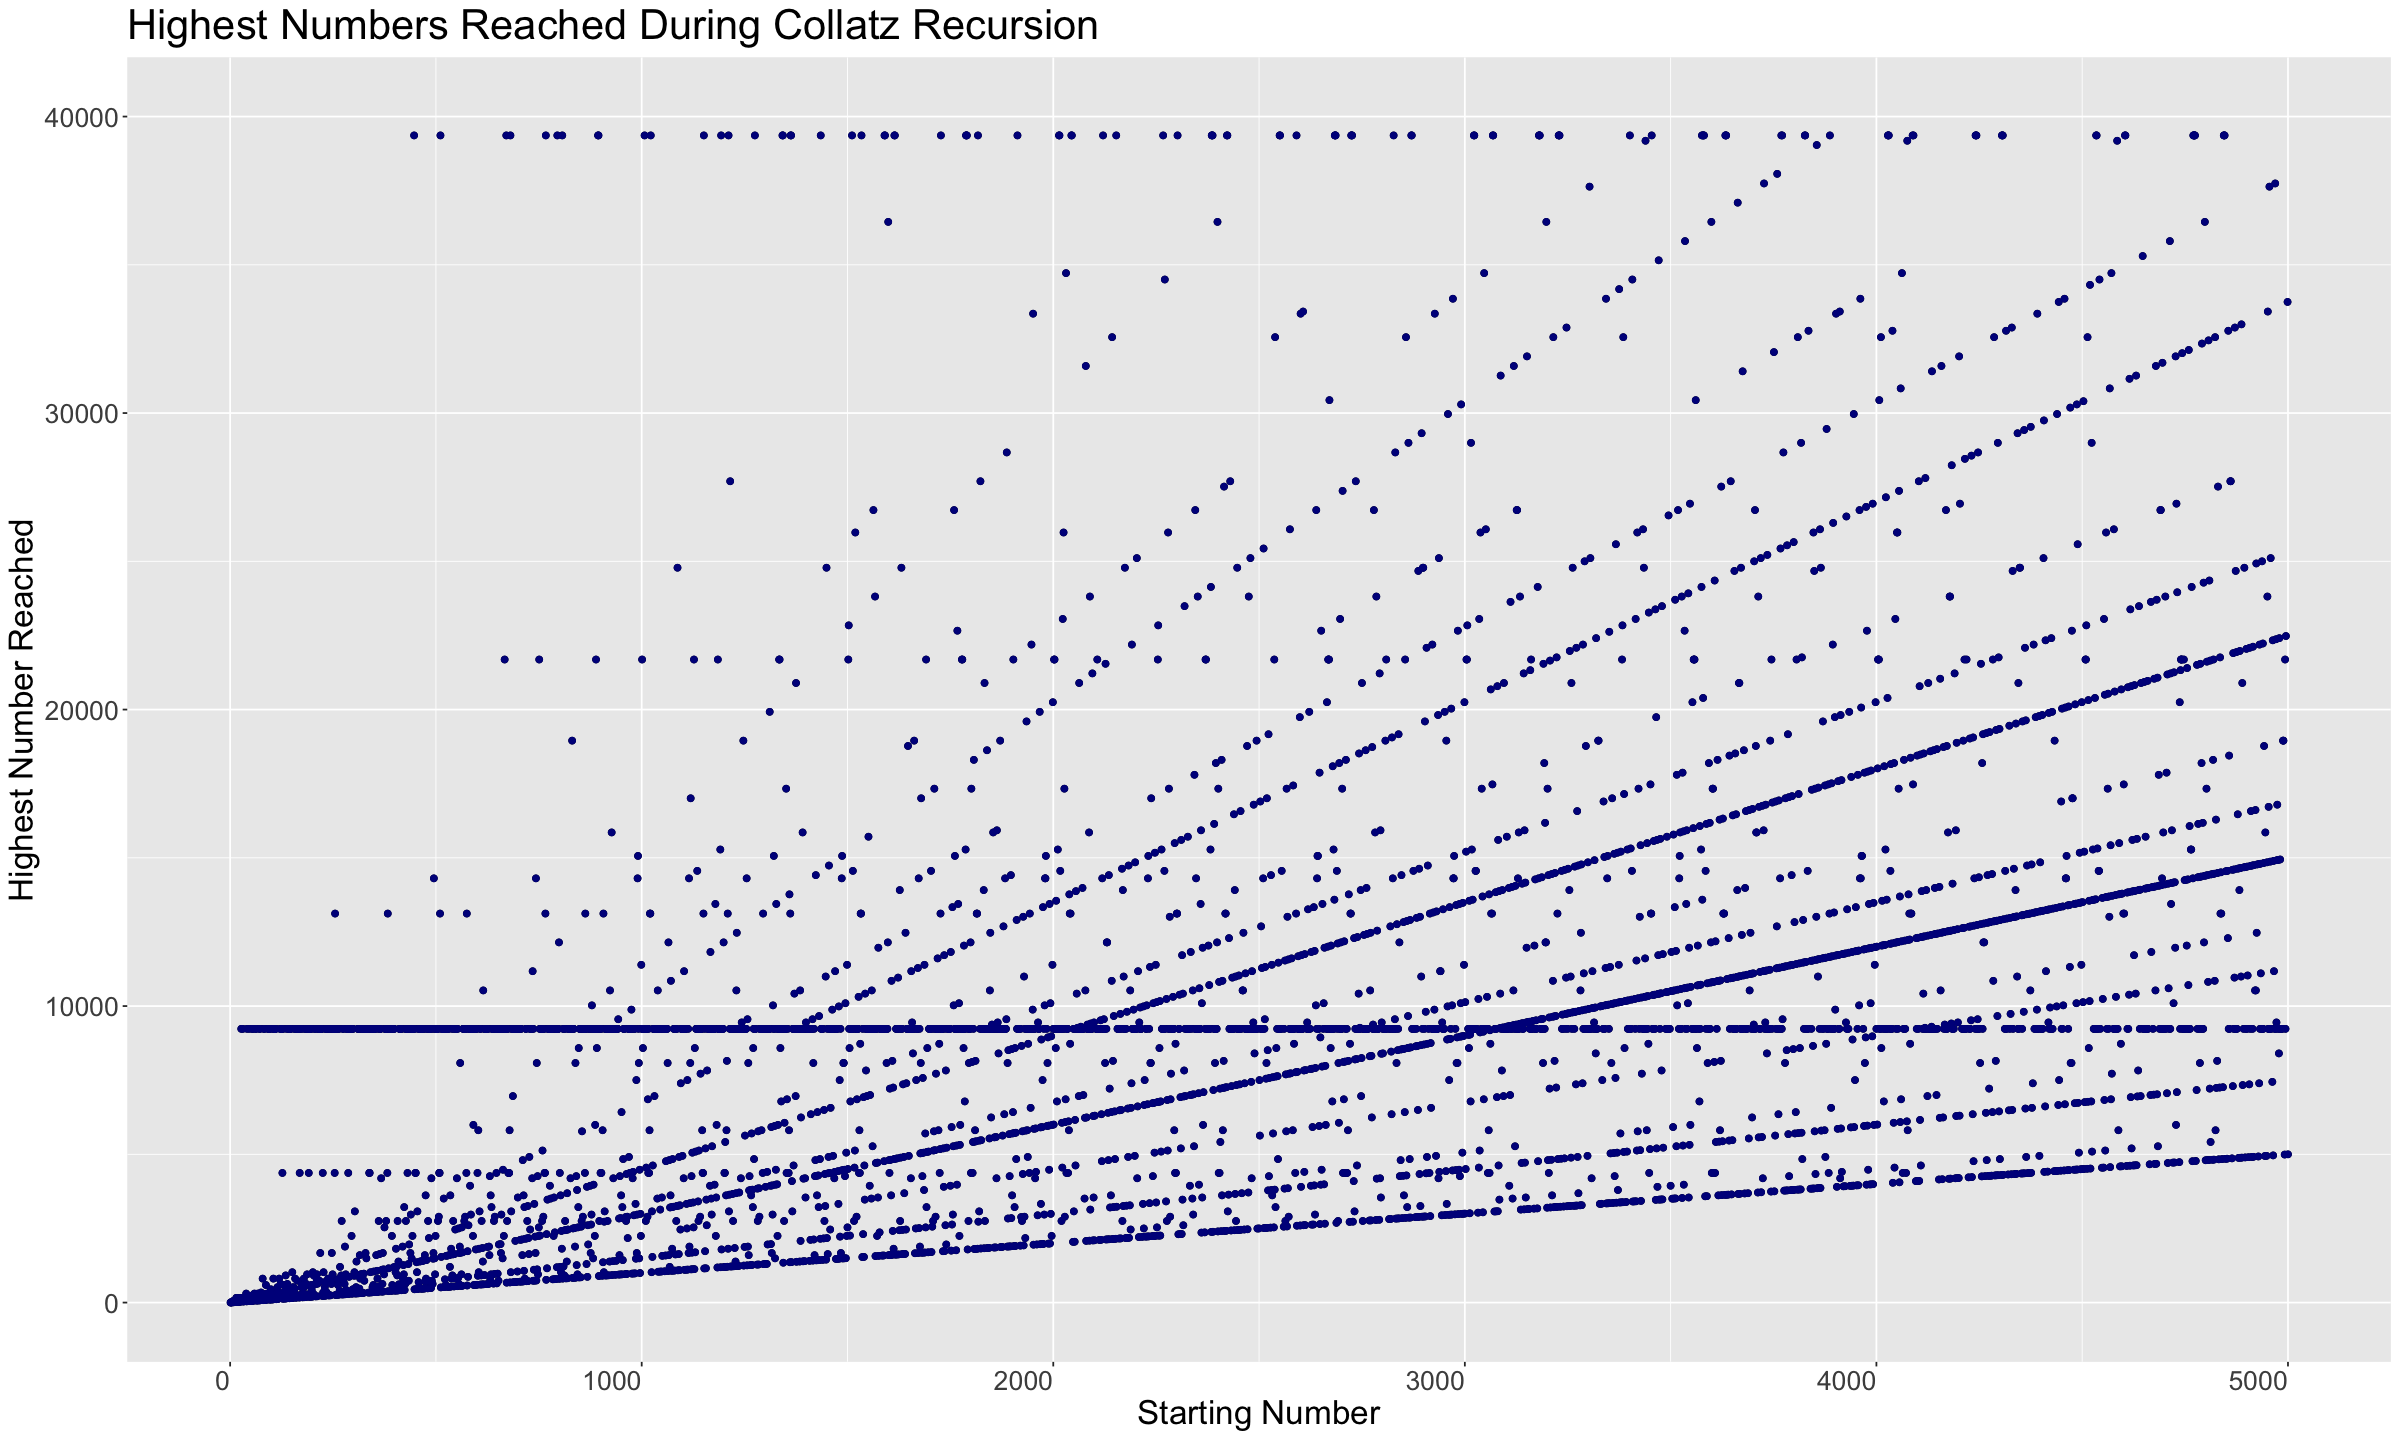

In [50]:
# Function to compute the Collatz recursion and record the highest number reached during the chain to 1
grapher <- function(n) {
  max_nums <- numeric(n)
  
  for (i in 1:n) {
    values <- numeric()
    a <- i
    
    for (j in 1:1000) {
      values <- c(values, a)
      if (a == 1) {
        break
      }
      if (a %% 2 == 1) {
        a <- 3 * a + 1
      } else {
        a <- a / 2
      }
    }
    
    max_nums[i] <- max(values)
  }
  
  return(max_nums)
}


# Function to graph the highest numbers reached during the Collatz recursion
graph_max_nums <- function(n) {
    options(repr.plot.width = 20, repr.plot.height = 12)
    x <- 1:n
    y <- grapher(n)

    data <- data.frame(x = x, y = y) 
    ggplot(data, aes(x = x, y = y)) +
    theme(plot.title = element_text(size = 25)) +
    theme(axis.title = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 16, angle = 0, hjust = 1),
          axis.text.y = element_text(size = 16, angle = 0, hjust = 1)) +
    geom_point(na.rm=TRUE) +
    geom_point(color = "dark blue", na.rm=TRUE) +
    labs(title = "Highest Numbers Reached During Collatz Recursion",
        x = "Starting Number",
        y = "Highest Number Reached") +
    xlim(0, n) +  # Fixed x-axis limits
    ylim(0, 40000) # Fixed y-axis limits
}

# Example usage: Plot the results for the first n numbers
graph_max_nums(5000)



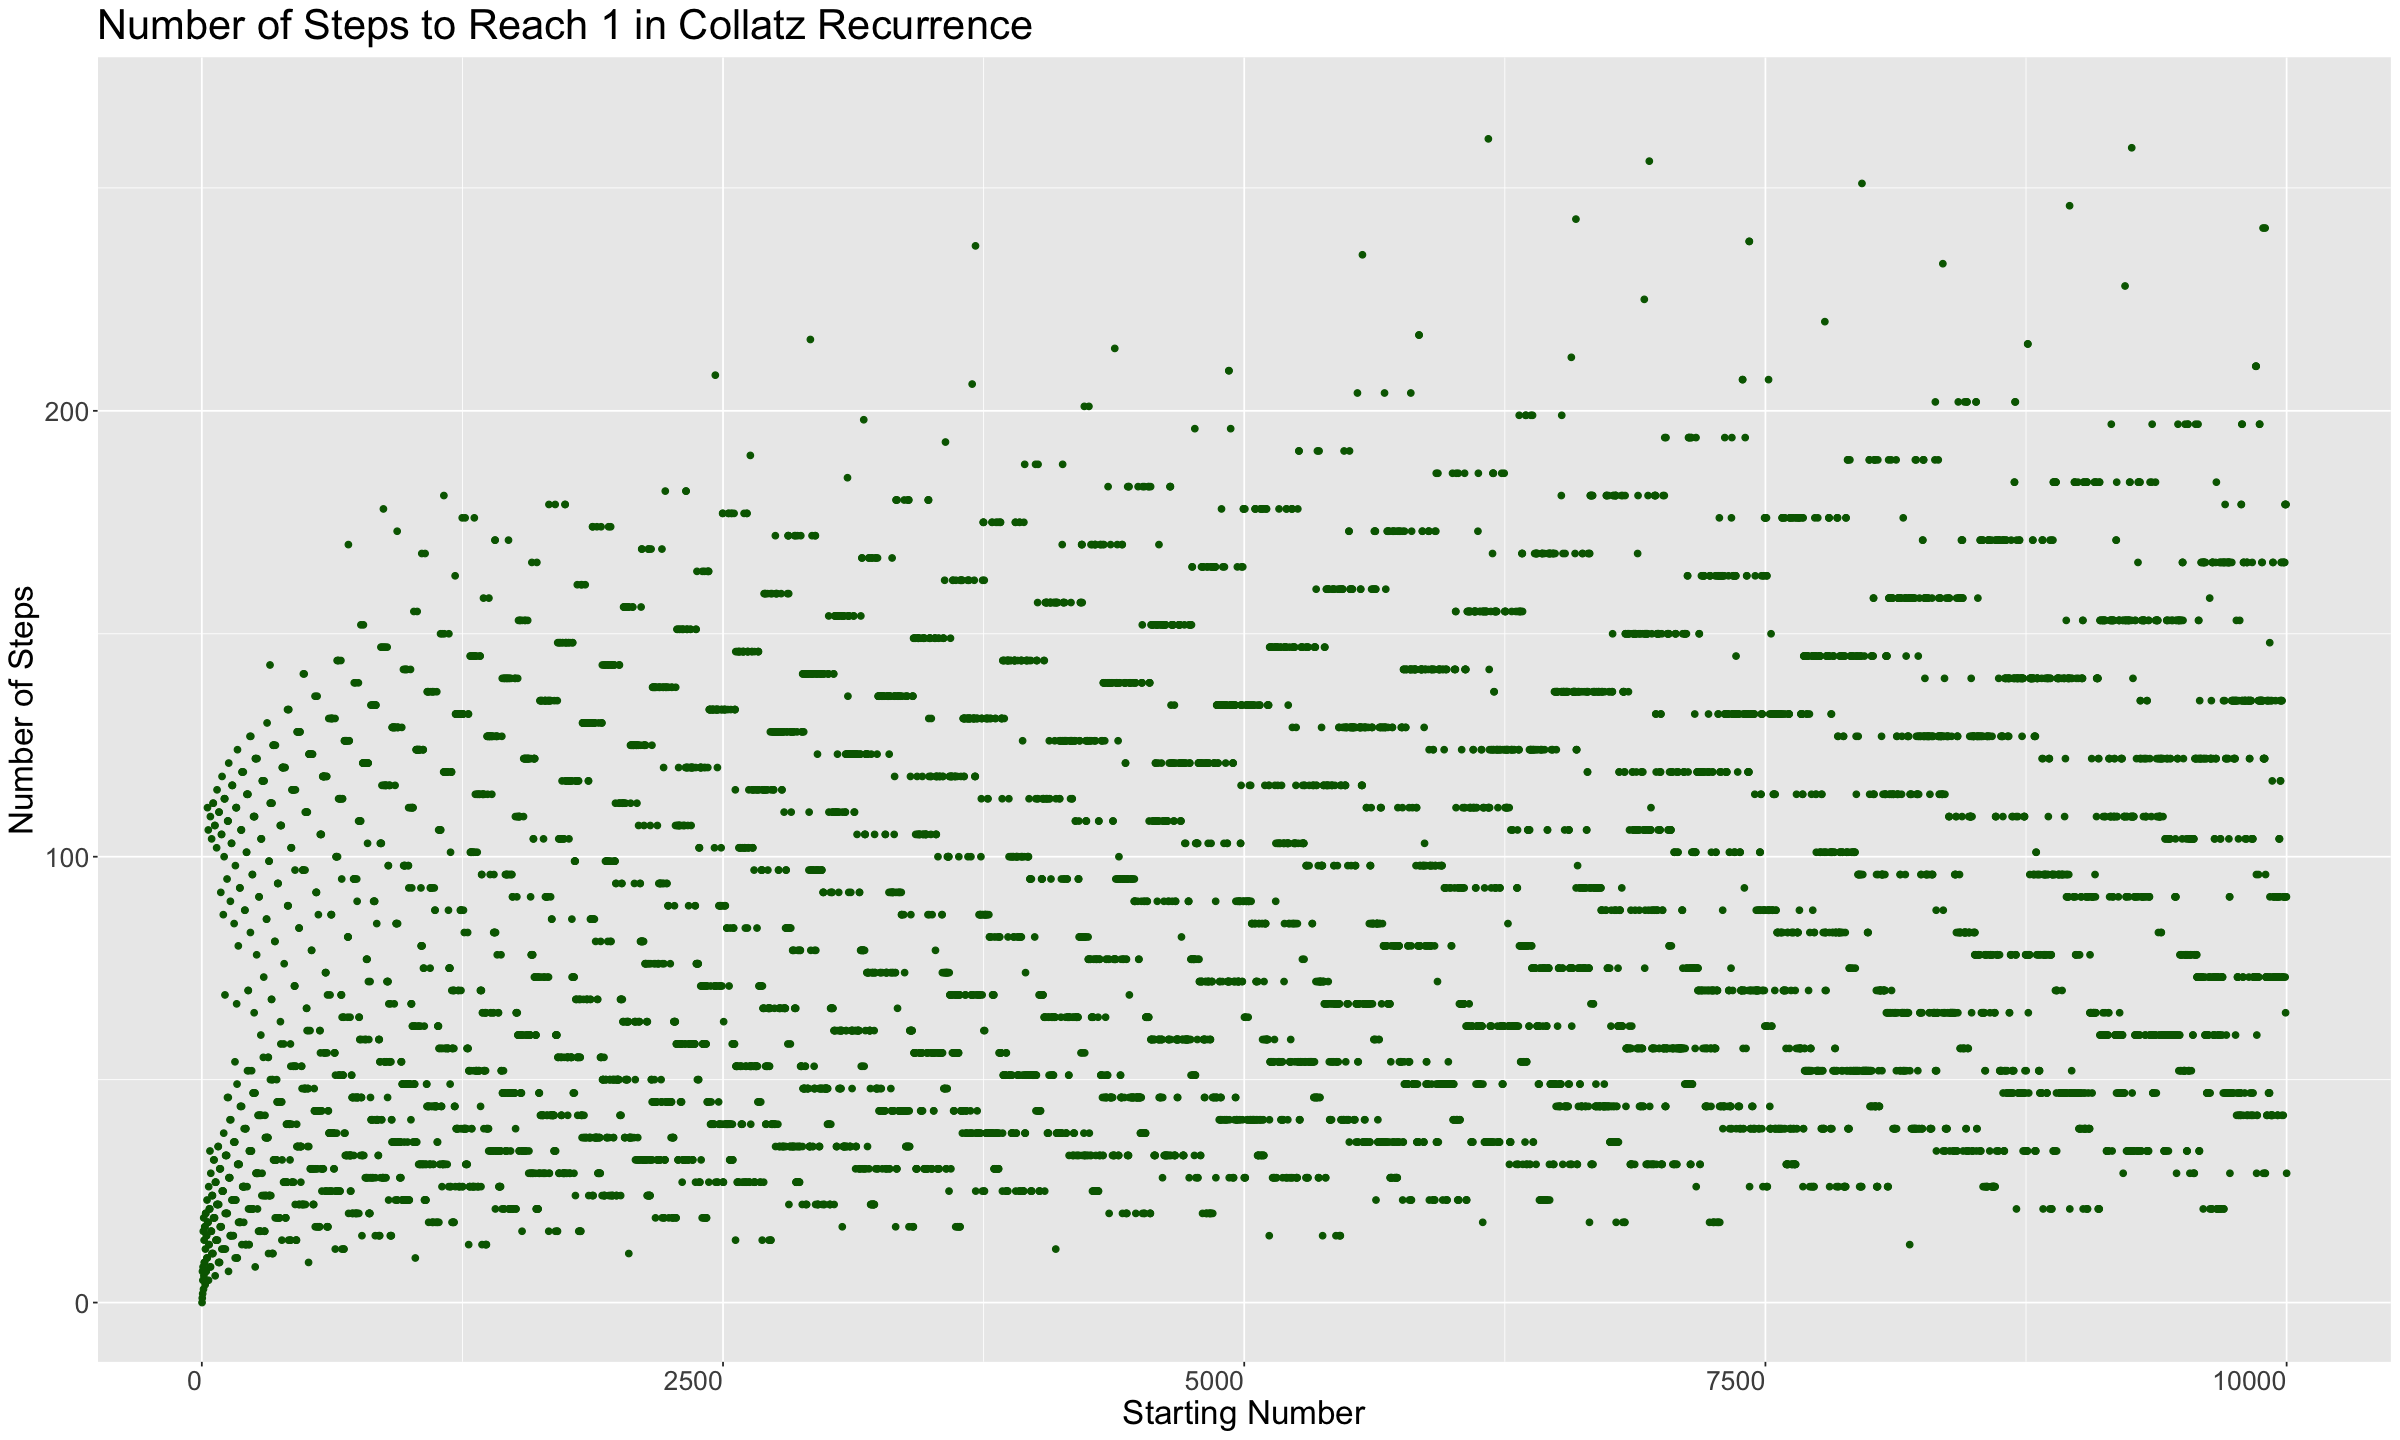

In [51]:
# Function to compute the number of steps for each number from 1 to n to reach 1 in the Collatz sequence
collatz_steps <- function(n) {
  steps <- numeric(n)
  
  for (i in 1:n) {
    count <- 0
    a <- i
    while (a != 1) {
      if (a %% 2 == 0) {
        a <- a / 2
      } else {
        a <- 3 * a + 1
      }
      count <- count + 1
    }
    steps[i] <- count
  }
  
  return(steps)
}


# Function to graph the number of steps it takes to reach 1 in Collatz recurrence
graph_collatz_steps <- function(n) {
  # Set the size of the plot
  options(repr.plot.width = 20, repr.plot.height = 12)
  
  x <- 1:n
  y <- collatz_steps(n)
  
  data <- data.frame(x = x, y = y)
  
  p <- ggplot(data, aes(x = x, y = y)) +
    geom_point(color = "dark green") +
    theme(plot.title = element_text(size = 25)) +
    theme(axis.title = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 16, angle = 0, hjust = 1),
          axis.text.y = element_text(size = 16, angle = 0, hjust = 1)) +
    labs(title = "Number of Steps to Reach 1 in Collatz Recurrence",
         x = "Starting Number",
         y = "Number of Steps") +
    xlim(0, n) +
    ylim(0, max(y) + 5) # Adjust y-axis limit based on data
  
  print(p)
}

# Plot the results for the first n numbers
graph_collatz_steps(10000)
